In [138]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


In [139]:
data = pd.read_csv('/Users/Bakso/Documents/git/604Final/data/daily_data.csv')

In [140]:
stations = data['station'].unique()

In [141]:
for station in stations: print(station) 

72202
72243
72278
72290
72327
72353
72405
72494
72530
72565
72572
72606
72658
72681
72698
72793
74486
91182
KARB0
KYIP0
PALH0


In [142]:
print(data.isna().sum())

rows_with_missing_values = data[data.isna().any(axis=1)]

print(rows_with_missing_values)

data.dropna(inplace = True)

station      0
date         0
temp_max     7
temp_mean    7
temp_min     7
rainfall     0
snow         0
dtype: int64
      station        date  temp_max  temp_mean  temp_min  rainfall   snow
66474   KARB0  2015-12-23       NaN        NaN       NaN      True  False
66475   KARB0  2015-12-24       NaN        NaN       NaN      True  False
67781   KARB0  2019-07-22       NaN        NaN       NaN     False  False
73841   PALH0  2016-02-22       NaN        NaN       NaN      True  False
73842   PALH0  2016-02-23       NaN        NaN       NaN     False  False
73843   PALH0  2016-02-24       NaN        NaN       NaN     False  False
73844   PALH0  2016-02-25       NaN        NaN       NaN     False  False


In [143]:
data['date'] = pd.to_datetime(data['date'])

latest_date = data['date'].max()

date_years_ago = latest_date - pd.DateOffset(years=5)

data_last_years = data[data['date'] >= date_years_ago]

In [151]:
data1 = data.loc[data['station'] == 'KARB0'].reset_index()

data2 = data_last_years.loc[data_last_years['station'] == 'KARB0'].reset_index()

In [152]:
split_index = len(data1) - 9

train_data = data1[:split_index]
test_data = data1[split_index:]

In [153]:
train_data.reset_index()
test_data.reset_index()

,level_0,index,station,date,temp_max,temp_mean,temp_min,rainfall,snow
0,3640,69367,KARB0,2023-11-24,3.9,-0.979167,-4.4,False,False
1,3641,69368,KARB0,2023-11-25,1.7,-4.675000,-10.0,False,False
2,3642,69369,KARB0,2023-11-26,1.1,-3.225000,-8.3,True,True
3,3643,69370,KARB0,2023-11-27,1.0,-1.345833,-4.4,True,False
4,3644,69371,KARB0,2023-11-28,-2.8,-5.500000,-9.4,True,True
5,3645,69372,KARB0,2023-11-29,0.0,-5.075000,-9.0,False,False
6,3646,69373,KARB0,2023-11-30,9.4,-1.187500,-10.0,False,False
7,3647,69374,KARB0,2023-12-01,7.2,4.837500,3.3,True,False
8,3648,69375,KARB0,2023-12-02,3.3,3.178571,2.6,True,False


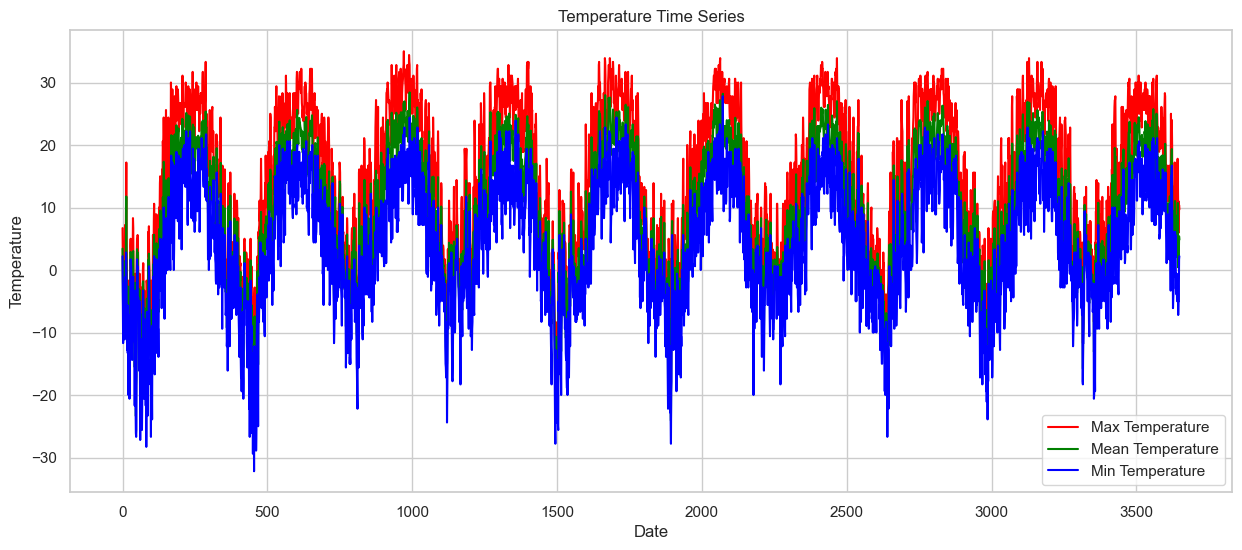

In [100]:
sns.set(style="whitegrid")

# Temperature time series plot
plt.figure(figsize=(15, 6))
plt.plot(data1['temp_max'], label='Max Temperature', color='red')
plt.plot(data1['temp_mean'], label='Mean Temperature', color='green')
plt.plot(data1['temp_min'], label='Min Temperature', color='blue')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('eda1.png')

## Implementing SARIMA Model 

### Check for Stationarity 

In [15]:
result = adfuller(data1['temp_mean']) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.262628
p-value: 0.016634


In [14]:
result = adfuller(data2['temp_mean']) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.584984
p-value: 0.096141


### Check for Seasonality

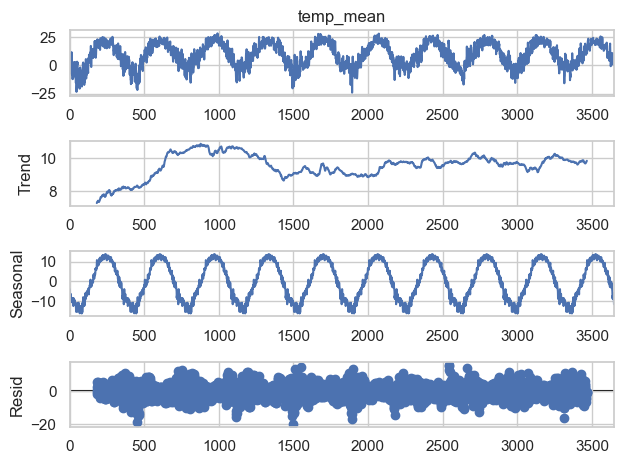

In [102]:
decomposition = seasonal_decompose(data1['temp_mean'], model='additive', period = 365)  
decomposition.plot()
plt.savefig('seasonal_decom.png')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 1, 0, 1  # Non-seasonal params
P, D, Q, s = 1, 1, 1, 360  # Seasonal params


sarima_model_temp_mean = SARIMAX(data1['temp_mean'],
                                 order=(p, d, q), seasonal_order = (P, D, Q, s))
                                

sarima_fit_temp_mean = sarima_model_temp_mean.fit()

predictions_temp_mean = sarima_fit_temp_mean.get_forecast(steps=10)
predicted_means = predictions_temp_mean.predicted_mean
predicted_means

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


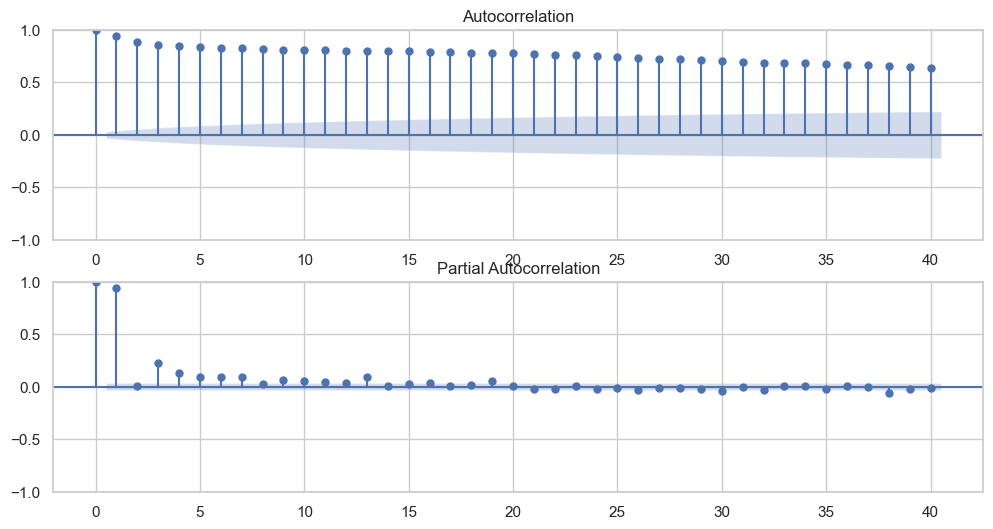

In [111]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Generate ACF and PACF plots for 'temp_mean'
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(train_data['temp_mean'], ax=plt.gca(), lags=40)  
plt.subplot(212)
plot_pacf(train_data['temp_mean'], ax=plt.gca(), lags=40)  
plt.savefig('ACF PACF Plots')


In [ ]:
from pmdarima import auto_arima

model = auto_arima(train_data['temp_mean'], seasonal=True, m=365, trace=True)

print(model.summary())

Performing stepwise search to minimize aic


In [12]:
def optimize_ARIMA(order_list, exog):

    results = []
    
    for order in tqdm_notebook(order_list):
        model = SARIMAX(exog, order=order).fit(disp=-1)
        aic = model.aic
        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
from itertools import product
from tqdm import tqdm_notebook

ps = range(0, 5, 1)
d = 0
qs = range(1, 20, 2)

parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = train_data['temp_mean'])

In [83]:
np.array(result_d_0['(p, d, q)'])[0]

(4, 0, 11)

In [154]:
# best_model_0 = SARIMAX(data1['temp_mean'], order= (1, 0, 1), seasonal_order=(1, 1, 1, 365)).fit()
best_model_0 = SARIMAX(train_data['temp_mean'], order= (2, 0, 13)).fit()
print(best_model_0.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62786D+00    |proj g|=  2.19694D-02


 This problem is unconstrained.



At iterate    5    f=  2.62708D+00    |proj g|=  1.29246D-03

At iterate   10    f=  2.62682D+00    |proj g|=  7.31711D-03

At iterate   15    f=  2.62672D+00    |proj g|=  1.47809D-04

At iterate   20    f=  2.62672D+00    |proj g|=  8.48566D-04

At iterate   25    f=  2.62651D+00    |proj g|=  8.77375D-03

At iterate   30    f=  2.62543D+00    |proj g|=  7.69652D-03

At iterate   35    f=  2.62403D+00    |proj g|=  2.17897D-02

At iterate   40    f=  2.62283D+00    |proj g|=  4.04644D-03

At iterate   45    f=  2.62187D+00    |proj g|=  6.51444D-03


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.62126D+00    |proj g|=  1.63086D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     55      1     0     0   1.631D-03   2.621D+00
  F =   2.6212588676464854     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:              temp_mean   No. Observations:                 3640
Model:              SARIMAX(2, 0, 13)   Log Likelihood               -9541.382
Date:                Sat, 02 Dec 2023   AIC                          19114.765
Time:                        15:35:05   BIC  

In [155]:
test_mean_temp = test_data['temp_mean']


predictions = np.array(best_model_0.forecast(steps=len(test_mean_temp)))


rmse = np.sqrt(mean_squared_error(np.array(test_mean_temp), predictions))
rmse

6.080666965781867

In [156]:
predictions

array([4.73504713, 3.5633568 , 3.55105863, 3.35918733, 3.42433508,
       2.74911029, 3.10475538, 2.66730089, 2.72916545])

In [157]:
test_data

,index,station,date,temp_max,temp_mean,temp_min,rainfall,snow
3640,69367,KARB0,2023-11-24,3.9,-0.979167,-4.4,False,False
3641,69368,KARB0,2023-11-25,1.7,-4.675000,-10.0,False,False
3642,69369,KARB0,2023-11-26,1.1,-3.225000,-8.3,True,True
3643,69370,KARB0,2023-11-27,1.0,-1.345833,-4.4,True,False
3644,69371,KARB0,2023-11-28,-2.8,-5.500000,-9.4,True,True
3645,69372,KARB0,2023-11-29,0.0,-5.075000,-9.0,False,False
3646,69373,KARB0,2023-11-30,9.4,-1.187500,-10.0,False,False
3647,69374,KARB0,2023-12-01,7.2,4.837500,3.3,True,False
3648,69375,KARB0,2023-12-02,3.3,3.178571,2.6,True,False


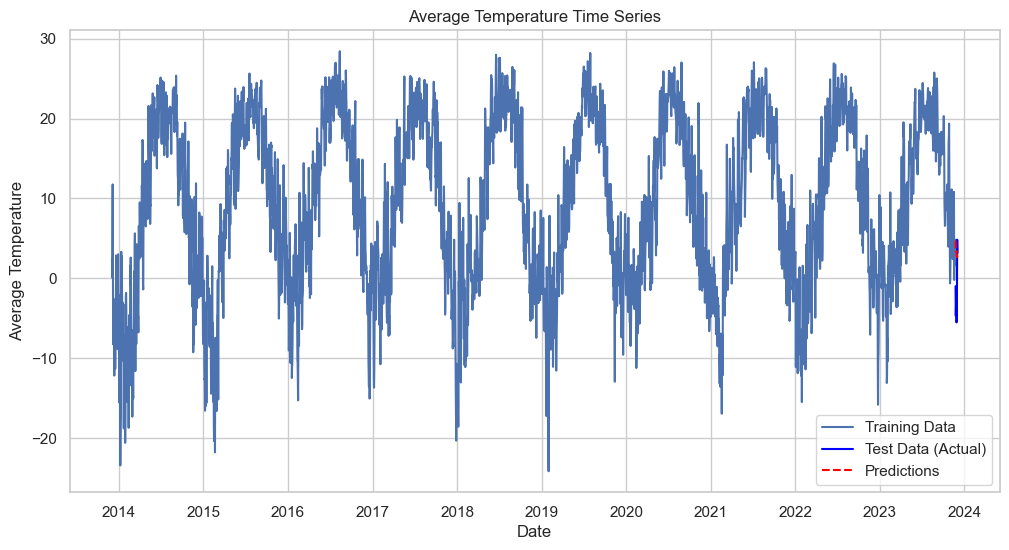

In [158]:
train_dates = train_data['date']
test_dates = test_data['date']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_dates, train_data['temp_mean'], label='Training Data')
plt.plot(test_dates, test_mean_temp, label='Test Data (Actual)', color='blue')
plt.plot(test_dates, predictions, label='Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Time Series')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
from itertools import product
from tqdm import tqdm_notebook

ps = range(0, 5, 1)
d = 0
qs = range(1, 20, 2)

parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = train_data['temp_min'])

/var/folders/83/l90nsr955zzdy6yv_p2ch0680000gr/T/ipykernel_81292/3394143862.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/50 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model

In [28]:
result_d_1.head()

,"(p, d, q)",AIC
0,"(4, 0, 11)",21436.037747
1,"(3, 0, 15)",21449.464590
2,"(4, 0, 15)",21453.455061
3,"(3, 0, 11)",21454.378034
4,"(3, 0, 17)",21461.172490


In [29]:
best_model_1 = SARIMAX(train_data['temp_min'], order= (4, 0, 11)).fit()
print(best_model_1.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95247D+00    |proj g|=  1.50892D-02

At iterate    5    f=  2.95203D+00    |proj g|=  9.00948D-04

At iterate   10    f=  2.95199D+00    |proj g|=  1.69265D-03

At iterate   15    f=  2.95186D+00    |proj g|=  4.17761D-03

At iterate   20    f=  2.95180D+00    |proj g|=  2.39184D-03

At iterate   25    f=  2.95106D+00    |proj g|=  7.26405D-03

At iterate   30    f=  2.95000D+00    |proj g|=  7.14108D-03

At iterate   35    f=  2.94710D+00    |proj g|=  1.39038D-02

At iterate   40    f=  2.94391D+00    |proj g|=  5.10598D-03

At iterate   45    f=  2.94256D+00    |proj g|=  9.90771D-03


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.94092D+00    |proj g|=  4.12743D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     60      1     0     0   4.127D-03   2.941D+00
  F =   2.9409230209939641     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:               temp_min   No. Observations:                 3639
Model:              SARIMAX(4, 0, 11)   Log Likelihood              -10702.019
Date:                Tue, 28 Nov 2023   AIC                          21436.038
Time:                        00:56:27   BIC  

In [30]:
test_min_temp = test_data['temp_min']


predictions = np.array(best_model_1.forecast(steps=len(test_min_temp)))


rmse = np.sqrt(mean_squared_error(np.array(test_min_temp), predictions))
rmse

3.6745663532925543

In [31]:
predictions

array([-1.96092288, -0.63640148, -1.0763145 , -0.55483012, -1.33404077,
       -0.81890101, -1.31475741, -1.1276389 , -1.4912959 , -1.56316591])

In [33]:
test_data['temp_min']

3639   -0.6
3640   -5.0
3641   -5.0
3642   -2.8
3643   -1.1
3644   -7.2
3645   -5.0
3646   -5.0
3647    1.7
3648    2.2
Name: temp_min, dtype: float64

### Taking only Oct-Dec data

In [159]:
data['date'] = pd.to_datetime(data['date'])
data = data.loc[data['station'] == 'KARB0']

od_data = data[(data['date'].dt.year >= 2014) & (data['date'].dt.month >= 10) & ((data['date'].dt.month < 12) | ((data['date'].dt.month == 12) & (data['date'].dt.day <= 12)))]

In [116]:
od_data[od_data['date'].dt.year == 2022]

,station,date,temp_max,temp_mean,temp_min,rainfall,snow
65295,KARB0,2022-10-01,21.1,13.125000,5.0,False,False
65296,KARB0,2022-10-02,18.3,14.604167,11.7,False,False
65297,KARB0,2022-10-03,18.3,10.362500,0.0,False,False
65298,KARB0,2022-10-04,21.7,10.158333,0.0,False,False
65299,KARB0,2022-10-05,23.3,12.695833,3.9,False,False
...,...,...,...,...,...,...,...
65363,KARB0,2022-12-08,7.2,4.266667,2.8,False,False
65364,KARB0,2022-12-09,3.3,0.583333,-2.8,False,False
65365,KARB0,2022-12-10,1.7,0.820833,0.0,True,False
65366,KARB0,2022-12-11,4.4,2.204167,0.6,False,False


In [160]:
variable = 'temp_mean'

# Test data: December 2, 2023
start_test_date = pd.to_datetime('2023-11-24')
end_test_date = pd.to_datetime('2023-12-02')

train_data = np.array(od_data[od_data['date'] < start_test_date][variable])
test_data = np.array(od_data[(od_data['date'] >= start_test_date) & (od_data['date'] <= end_test_date)][variable])

# order = (1, 1, 1)
# seasonal_order = (1, 1, 1, 12)

# sarima_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
# sarima_results = sarima_model.fit()

# predictions = sarima_results.predict(start=start_test_date, end=end_test_date)

# predictions 


In [161]:
test_data

array([-0.97916667, -4.675     , -3.225     , -1.34583333, -5.5       ,
       -5.075     , -1.1875    ,  4.8375    ,  3.17857143])

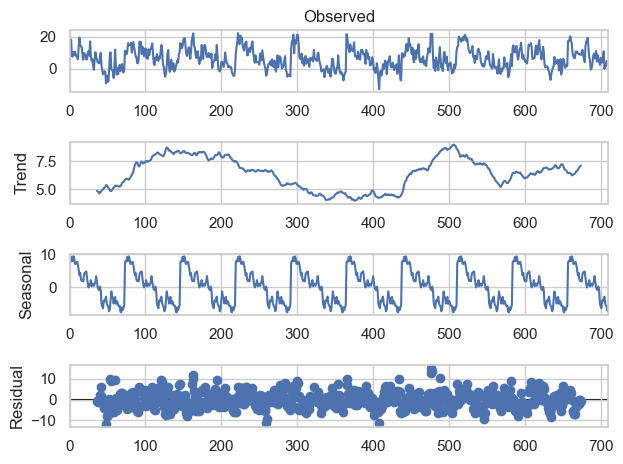

In [162]:
decomposition = seasonal_decompose(train_data, model='additive', period = 73)  
decomposition.plot()
plt.savefig('OctDec_seasonal.png')

In [120]:
result = adfuller(train_data) 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.702569
p-value: 0.000000


In [ ]:
from pmdarima import auto_arima

model = auto_arima(train_data, seasonal=True, m=73, trace=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[73] intercept   : AIC=inf, Time=43.41 sec
 ARIMA(0,0,0)(0,0,0)[73] intercept   : AIC=4653.996, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[73] intercept   : AIC=3972.292, Time=6.21 sec
 ARIMA(0,0,1)(0,0,1)[73] intercept   : AIC=4159.059, Time=12.07 sec
 ARIMA(0,0,0)(0,0,0)[73]             : AIC=5155.242, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[73] intercept   : AIC=3988.958, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[73] intercept   : AIC=3966.461, Time=37.93 sec
 ARIMA(1,0,0)(2,0,1)[73] intercept   : AIC=inf, Time=147.45 sec
 ARIMA(1,0,0)(1,0,1)[73] intercept   : AIC=inf, Time=27.15 sec
 ARIMA(0,0,0)(2,0,0)[73] intercept   : AIC=inf, Time=34.42 sec
 ARIMA(2,0,0)(2,0,0)[73] intercept   : AIC=3967.939, Time=49.34 sec
 ARIMA(1,0,1)(2,0,0)[73] intercept   : AIC=3967.761, Time=45.51 sec
 ARIMA(0,0,1)(2,0,0)[73] intercept   : AIC=4089.763, Time=55.18 sec
 ARIMA(2,0,1)(2,0,0)[73] intercept   : AIC=3965.297, Time=133.14 sec
 ARIMA(2,0,1)(1,0,0)[73] in

In [163]:
nd_model = SARIMAX(train_data, order= (2, 0, 2), seasonal_order = (1,1,1,73)).fit()
print(nd_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61900D+00    |proj g|=  5.28264D-02


 This problem is unconstrained.



At iterate    5    f=  2.54228D+00    |proj g|=  1.40602D-02

At iterate   10    f=  2.53707D+00    |proj g|=  6.09601D-03

At iterate   15    f=  2.53599D+00    |proj g|=  1.05370D-03

At iterate   20    f=  2.53585D+00    |proj g|=  2.07281D-03

At iterate   25    f=  2.53583D+00    |proj g|=  2.15739D-04

At iterate   30    f=  2.53583D+00    |proj g|=  8.37753D-05

At iterate   35    f=  2.53582D+00    |proj g|=  1.36147D-03

At iterate   40    f=  2.53582D+00    |proj g|=  7.06387D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     46      1     0     0   4.573D-05   2.536D+00
  F =   2.53582010619

In [165]:
predictions = np.array(nd_model.forecast(steps=len(test_data)))


rmse = np.sqrt(mean_squared_error(np.array(test_data), predictions))
rmse

6.704318378777187

## All Stations RMSE

In [190]:
data = pd.read_csv('/Users/Bakso/Documents/git/604Final/data/daily_data.csv')
data.dropna(inplace = True)
data['date'] = pd.to_datetime(data['date'])
start_test_date = pd.to_datetime('2023-11-25')
test_data = data[(pd.to_datetime(data['date']) >= start_test_date)].reset_index()
test_data = test_data.drop(columns = ['rainfall', 'snow'])

predictions = pd.read_csv('/Users/Bakso/Documents/git/604Final/models/arima/ARIMA_test_predictions.csv')
predictions['date'] = pd.to_datetime(predictions['date'])

In [191]:
df = test_data.merge(predictions, on = ['station', 'date'])
df

,index,station,date,temp_max_x,temp_mean_x,temp_min_x,Unnamed: 0,temp_mean_y,temp_min_y,temp_max_y
0,3645,72202,2023-11-25,28.3,24.629167,22.8,1,25.535480,22.878111,28.687861
1,3646,72202,2023-11-26,28.9,26.495833,23.9,2,25.783771,22.932243,28.751637
2,3647,72202,2023-11-27,26.7,24.979167,22.2,3,25.756777,22.954335,28.783662
3,3648,72202,2023-11-28,24.4,20.937500,17.8,4,25.637533,22.958577,28.791256
4,3649,72202,2023-11-29,24.4,19.379167,15.0,5,25.727152,22.955803,28.789252
...,...,...,...,...,...,...,...,...,...,...
163,76677,PALH0,2023-11-28,5.6,2.125000,-1.1,4,-5.263934,-6.888728,-3.128561
164,76678,PALH0,2023-11-29,4.0,1.854167,-1.0,5,-5.544420,-7.070009,-3.431995
165,76679,PALH0,2023-11-30,2.0,-0.041667,-2.0,6,-6.121200,-6.710562,-3.913749
166,76680,PALH0,2023-12-01,3.3,-2.750000,-5.0,7,-6.432904,-7.110626,-4.136087


In [193]:
repeat_counts = {
    '2023-11-26': 1,
    '2023-11-27': 2,
    '2023-11-28': 3,
    '2023-11-29': 3,
    '2023-11-30': 2,
    '2023-12-01': 1
}

weighted_df = pd.DataFrame()
for date, count in repeat_counts.items():
    subset = df[df['date'] == date]
    weighted_df = weighted_df.append([subset] * count, ignore_index=True)

weighted_df

/var/folders/83/l90nsr955zzdy6yv_p2ch0680000gr/T/ipykernel_81292/451029908.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weighted_df = weighted_df.append([subset] * count, ignore_index=True)


,index,station,date,temp_max_x,temp_mean_x,temp_min_x,Unnamed: 0,temp_mean_y,temp_min_y,temp_max_y
0,3646,72202,2023-11-26,28.9,26.495833,23.9,2,25.783771,22.932243,28.751637
1,7299,72243,2023-11-26,15.6,14.387500,11.1,2,14.075748,11.110874,18.482361
2,10952,72278,2023-11-26,22.0,14.854167,8.3,2,18.243213,13.614660,24.122456
3,14605,72290,2023-11-26,21.1,14.570833,7.8,2,16.168192,10.587254,21.833202
4,18258,72327,2023-11-26,12.0,8.708333,4.4,2,9.941348,4.470409,16.914135
...,...,...,...,...,...,...,...,...,...,...
247,62069,74486,2023-12-01,9.0,6.391667,2.8,7,6.524153,3.108166,10.033830
248,65722,91182,2023-12-01,26.0,24.404167,22.9,7,25.087482,22.410937,28.622679
249,69374,KARB0,2023-12-01,7.2,4.837500,3.3,7,2.758299,-2.809203,9.182619
250,73027,KYIP0,2023-12-01,7.0,4.591667,3.2,7,2.783105,-1.203410,9.124531


In [197]:
mean_rmse = np.sqrt(mean_squared_error(weighted_df['temp_mean_x'],weighted_df['temp_mean_y']))
min_rmse = np.sqrt(mean_squared_error(weighted_df['temp_min_x'],weighted_df['temp_min_y']))
max_rmse = np.sqrt(mean_squared_error(weighted_df['temp_max_x'],weighted_df['temp_max_y']))

In [198]:
print('Temp Mean RMSE: %f' % mean_rmse)
print('Temp Min RMSE: %f' % min_rmse)
print('Temp Max RMSE: %f' % max_rmse)

Temp Mean RMSE: 4.911541
Temp Min RMSE: 5.107009
Temp Max RMSE: 5.609962
